In [1]:
import matplotlib.pyplot as plt
import numpy as np

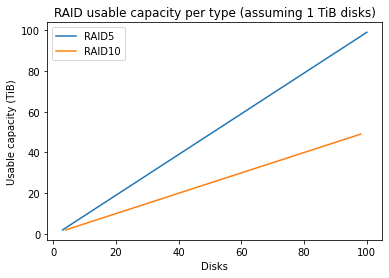

In [95]:
maxdisks = 100
raid5 = [None, None, None] + [i for i in range(2, maxdisks)]
raid10 = [None, None, None, None] + [i/2 for i in range(4, maxdisks-1)]

fig, ax = plt.subplots()
plt.title("RAID usable capacity per type (assuming 1 TiB disks)")
plt.plot(raid5, label="RAID5")
plt.plot(raid10, label="RAID10")
plt.xlabel('Disks')
plt.ylabel('Usable capacity (TiB)')
ax.legend()
plt.show()
fig.savefig('usable_capacity.png', dpi=fig.dpi)

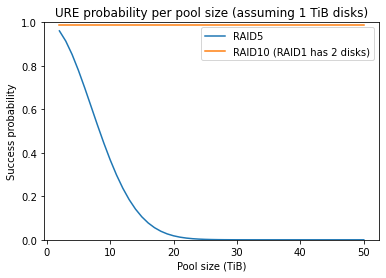

In [105]:
disk_size_tib = 1
min_capacity = 2 * disk_size_tib

def success_probability(n_disks, total_bits_to_read, URE_probability = 10**-14):
    return (1 - URE_probability)**((n_disks - 1) * total_bits_to_read)

pool_size = range(min_capacity, 51)
raid5ure = [success_probability((i/disk_size_tib)+1, i * 10**12) for i in pool_size]
raid10ure = [success_probability(2, disk_size_tib * 10**12) for i in pool_size]

fig, ax = plt.subplots()
plt.title("URE probability per pool size (assuming %d TiB disks)" % disk_size_tib)
plt.plot(pool_size, raid5ure, label="RAID5")
plt.plot(pool_size, raid10ure, label="RAID10 (RAID1 has 2 disks)")
plt.xlabel('Pool size (TiB)')
plt.ylabel('Success probability')
ax.set_ylim([0, 1])
ax.legend()
plt.show()
fig.savefig('ure_prob_%d.png' % disk_size_tib, dpi=fig.dpi)

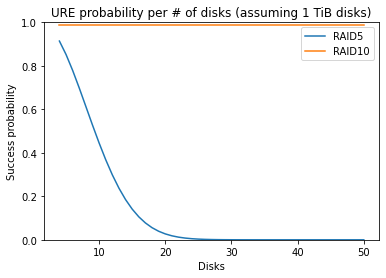

In [103]:
disk_size_tib = 1
disks = range(4, 51)

def success_probability(n_disks, total_bits_to_read, URE_probability = 10**-14):
    return (1 - URE_probability)**((n_disks - 1) * total_bits_to_read)

raid5ure_disks = [success_probability(i, (i-1) * 10**12) for i in disks]
raid10ure_disks = [success_probability(2, disk_size_tib * 10**12) for i in disks]

fig, ax = plt.subplots()
plt.title("URE probability per # of disks (assuming %d TiB disks)" % disk_size_tib)
plt.plot(disks, raid5ure_disks, label="RAID5")
plt.plot(disks, raid10ure_disks, label="RAID10")
plt.xlabel('Disks')
plt.ylabel('Success probability')
ax.set_ylim([0, 1])
ax.legend()
plt.show()

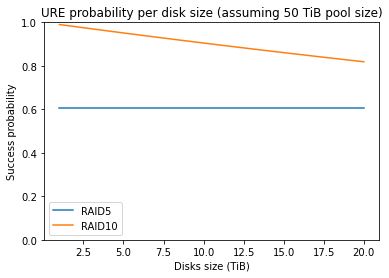

In [121]:
pool_size = 50
disk_sizes = range(1, 21)

def success_probability(n_disks, total_bits_to_read, URE_probability = 10**-14):
    return (1 - URE_probability)**((n_disks - 1) * total_bits_to_read)

raid5ure_pool = [success_probability((pool_size/i)+1, i * 10**12) for i in disk_sizes]
raid10ure_pool = [success_probability(2, i * 10**12) for i in disk_sizes]

fig, ax = plt.subplots()
plt.title("URE probability per disk size (assuming %d TiB pool size)" % pool_size)
plt.plot(disk_sizes, raid5ure_pool, label="RAID5")
plt.plot(disk_sizes, raid10ure_pool, label="RAID10")
plt.xlabel('Disks size (TiB)')
plt.ylabel('Success probability')
ax.set_ylim([0, 1])
ax.legend()
plt.show()
fig.savefig('ure_prob_disks_%d.png' % pool_size, dpi=fig.dpi)